In [1]:
library(ggplot2)
library(readr)
library(gridExtra)
library(grid)
library(plyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
iris=read.csv("iris.csv")

iris[sample(nrow(iris),10),]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
3,3,4.7,3.2,1.3,0.2,Iris-setosa
50,50,5.0,3.3,1.4,0.2,Iris-setosa
130,130,7.2,3.0,5.8,1.6,Iris-virginica
117,117,6.5,3.0,5.5,1.8,Iris-virginica
21,21,5.4,3.4,1.7,0.2,Iris-setosa
23,23,4.6,3.6,1.0,0.2,Iris-setosa
68,68,5.8,2.7,4.1,1.0,Iris-versicolor
139,139,6.0,3.0,4.8,1.8,Iris-virginica
51,51,7.0,3.2,4.7,1.4,Iris-versicolor
38,38,4.9,3.1,1.5,0.1,Iris-setosa


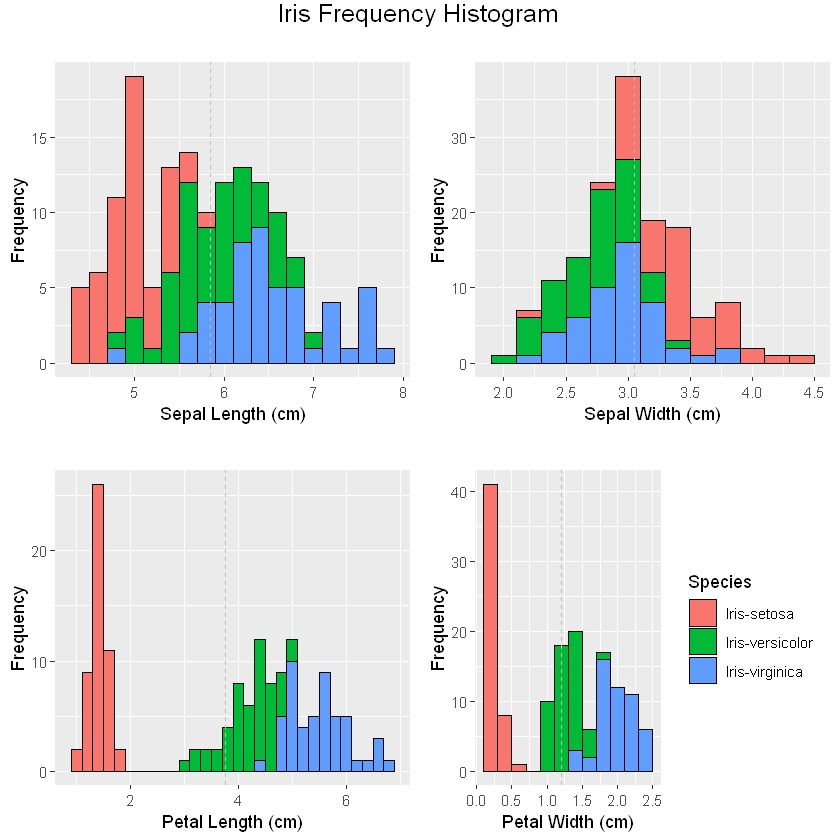

In [3]:
HisSl <- ggplot(data=iris, aes(x=SepalLengthCm))+
  geom_histogram(binwidth=0.2, color="black", aes(fill=Species)) + 
  xlab("Sepal Length (cm)") +  
  ylab("Frequency") + 
  theme(legend.position="none")+
  ggtitle("Histogram of Sepal Length")+
  geom_vline(data=iris, aes(xintercept = mean(SepalLengthCm)),linetype="dashed",color="grey")


HistSw <- ggplot(data=iris, aes(x=SepalWidthCm)) +
  geom_histogram(binwidth=0.2, color="black", aes(fill=Species)) + 
  xlab("Sepal Width (cm)") +  
  ylab("Frequency") + 
  theme(legend.position="none")+
  ggtitle("Histogram of Sepal Width")+
  geom_vline(data=iris, aes(xintercept = mean(SepalWidthCm)),linetype="dashed",color="grey")


HistPl <- ggplot(data=iris, aes(x=PetalLengthCm))+
  geom_histogram(binwidth=0.2, color="black", aes(fill=Species)) + 
  xlab("Petal Length (cm)") +  
  ylab("Frequency") + 
  theme(legend.position="none")+
  ggtitle("Histogram of Petal Length")+
  geom_vline(data=iris, aes(xintercept = mean(PetalLengthCm)),
             linetype="dashed",color="grey")



HistPw <- ggplot(data=iris, aes(x=PetalWidthCm))+
  geom_histogram(binwidth=0.2, color="black", aes(fill=Species)) + 
  xlab("Petal Width (cm)") +  
  ylab("Frequency") + 
  theme(legend.position="right" )+
  ggtitle("Histogram of Petal Width")+
  geom_vline(data=iris, aes(xintercept = mean(PetalWidthCm)),linetype="dashed",color="grey")


grid.arrange(HisSl + ggtitle(""),
             HistSw + ggtitle(""),
             HistPl + ggtitle(""),
             HistPw  + ggtitle(""),
             nrow = 2,
             top = textGrob("Iris Frequency Histogram", 
                            gp=gpar(fontsize=15))
)

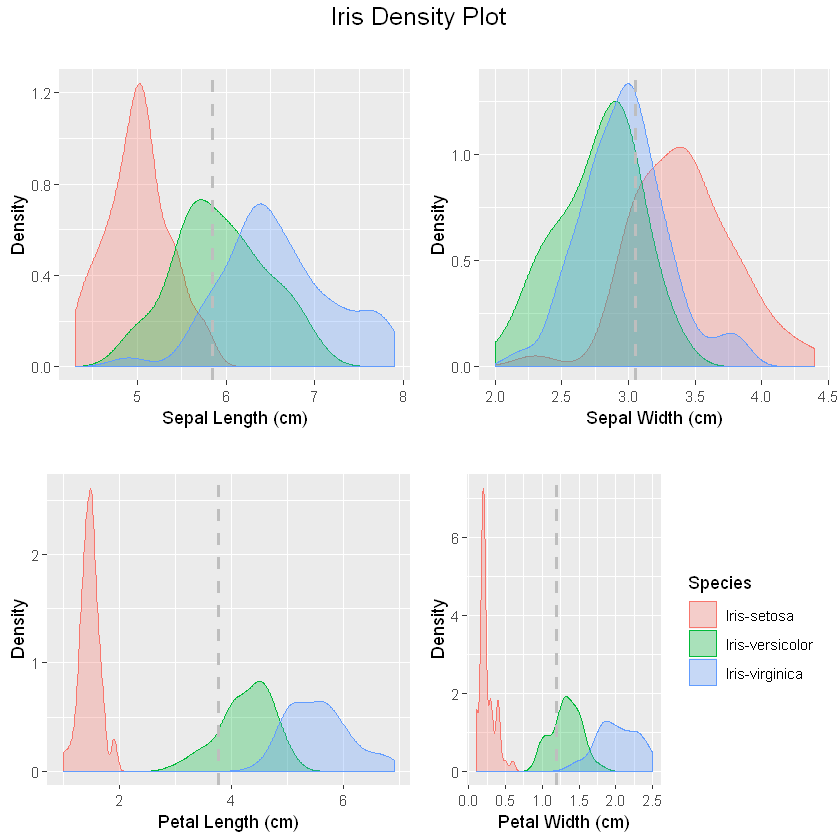

In [4]:
DhistPl <-    ggplot(iris, aes(x=PetalLengthCm, colour=Species, fill=Species)) +
  geom_density(alpha=.3) +
  geom_vline(aes(xintercept=mean(PetalLengthCm),  colour=Species),linetype="dashed",color="grey", size=1)+
  xlab("Petal Length (cm)") +  
  ylab("Density")+
  theme(legend.position="none")

DhistPw <- ggplot(iris, aes(x=PetalWidthCm, colour=Species, fill=Species)) +
  geom_density(alpha=.3) +
  geom_vline(aes(xintercept=mean(PetalWidthCm),  colour=Species),linetype="dashed",color="grey", size=1)+
  xlab("Petal Width (cm)") +  
  ylab("Density")
  


DhistSw <- ggplot(iris, aes(x=SepalWidthCm, colour=Species, fill=Species)) +
  geom_density(alpha=.3) +
  geom_vline(aes(xintercept=mean(SepalWidthCm),  colour=Species), linetype="dashed",color="grey", size=1)+
  xlab("Sepal Width (cm)") +  
  ylab("Density")+
  theme(legend.position="none")


DhistSl <- ggplot(iris, aes(x=SepalLengthCm, colour=Species, fill=Species)) +
  geom_density(alpha=.3) +
  geom_vline(aes(xintercept=mean(SepalLengthCm),  colour=Species),linetype="dashed", color="grey", size=1)+
  xlab("Sepal Length (cm)") +  
  ylab("Density")+
  theme(legend.position="none")


grid.arrange(DhistSl + ggtitle(""),
             DhistSw  + ggtitle(""),
             DhistPl + ggtitle(""),
             DhistPw  + ggtitle(""),
             nrow = 2,
             top = textGrob("Iris Density Plot", 
                            gp=gpar(fontsize=15))
)


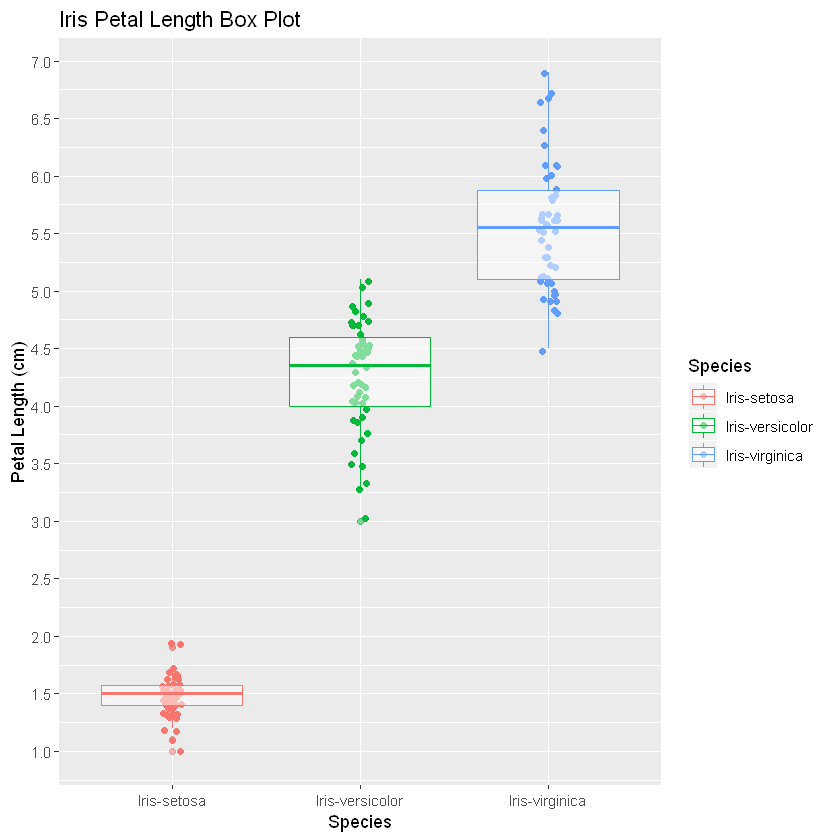

In [5]:
ggplot(iris, aes(Species, PetalLengthCm, color=Species)) + 
  geom_jitter(width=0.05) +
  geom_boxplot(alpha=0.5)+
  scale_y_continuous("Petal Length (cm)", breaks= seq(0,30, by=.5))+
  labs(title = "Iris Petal Length Box Plot", x = "Species")


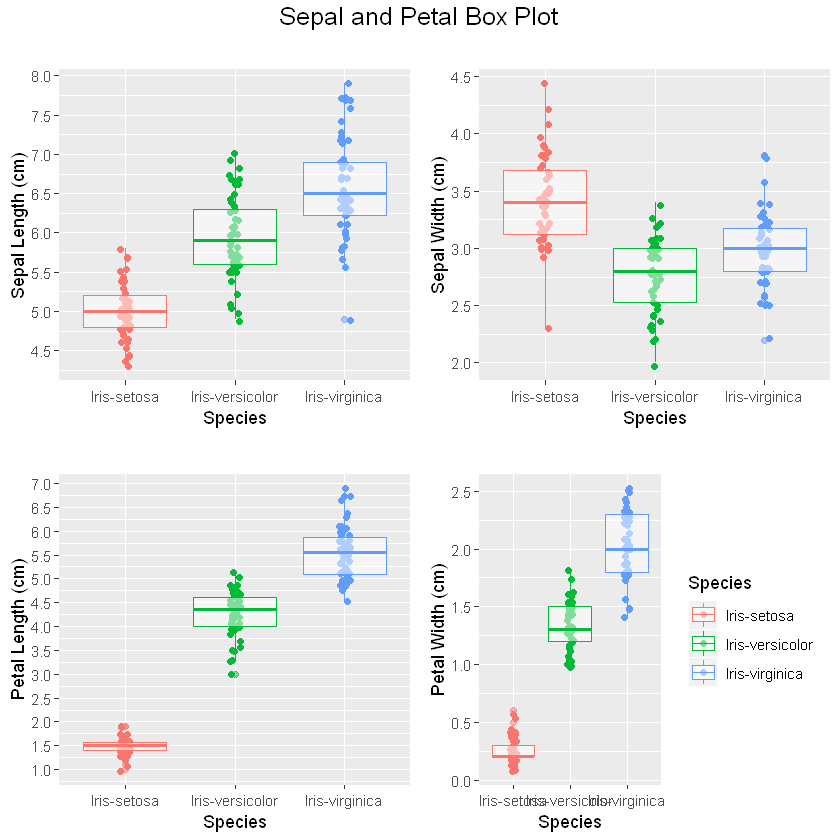

In [6]:
BpSl <- ggplot(iris, aes(Species, SepalLengthCm, color=Species)) + 
        geom_jitter(width=0.05) +
        geom_boxplot(alpha=0.5)+
        scale_y_continuous("Sepal Length (cm)", breaks= seq(0,30, by=.5))+
        theme(legend.position="none")



BpSw <-  ggplot(iris, aes(Species, SepalWidthCm, color=Species)) + 
          geom_jitter(width=0.05) +
          geom_boxplot(alpha=0.5)+
          scale_y_continuous("Sepal Width (cm)", breaks= seq(0,30, by=.5))+
          theme(legend.position="none")



BpPl <- ggplot(iris, aes(Species, PetalLengthCm, color=Species)) + 
        geom_jitter(width=0.05) +
        geom_boxplot(alpha=0.5)+
        scale_y_continuous("Petal Length (cm)", breaks= seq(0,30, by=.5))+
        theme(legend.position="none")
        


BpPw <-  ggplot(iris, aes(Species, PetalWidthCm, color=Species)) + 
        geom_jitter(width=0.05) +
        geom_boxplot(alpha=0.5)+
        scale_y_continuous("Petal Width (cm)", breaks= seq(0,30, by=.5))+
        labs(title = "Iris Box Plot", x = "Species")



# Plot all visualizations
grid.arrange(BpSl  + ggtitle(""),
             BpSw  + ggtitle(""),
             BpPl + ggtitle(""),
             BpPw + ggtitle(""),
             nrow = 2,
             top = textGrob("Sepal and Petal Box Plot", 
                            gp=gpar(fontsize=15))
)

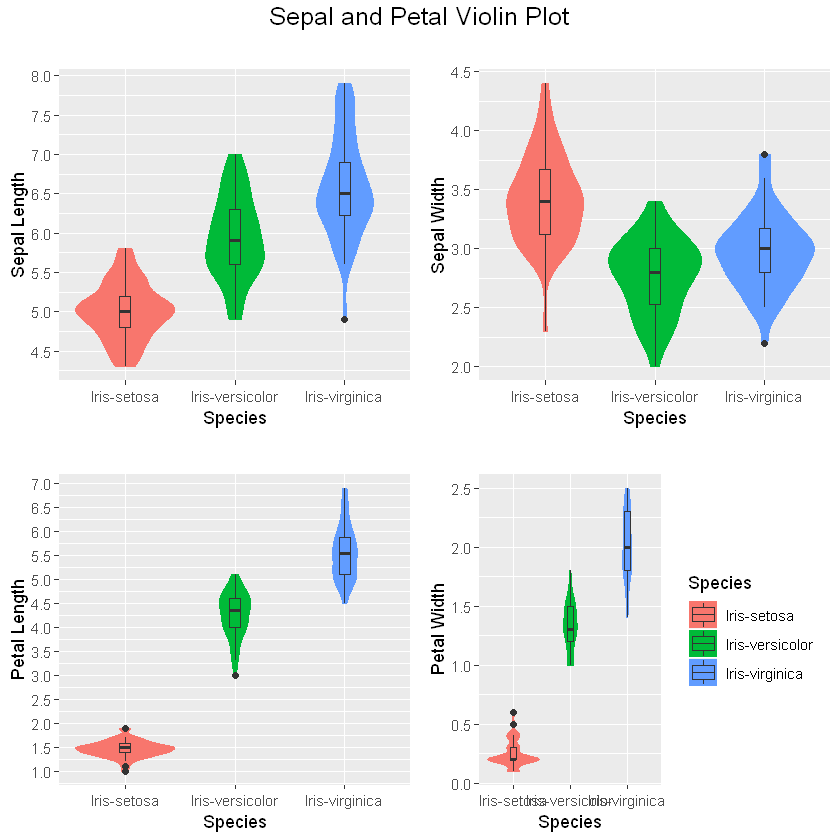

In [7]:
VpSl <-  ggplot(iris, aes(Species, SepalLengthCm, fill=Species)) + 
        geom_violin(aes(color = Species), trim = T)+
        scale_y_continuous("Sepal Length", breaks= seq(0,30, by=.5))+
        geom_boxplot(width=0.1)+
        theme(legend.position="none")

VpSw <-  ggplot(iris, aes(Species, SepalWidthCm, fill=Species)) + 
        geom_violin(aes(color = Species), trim = T)+
        scale_y_continuous("Sepal Width", breaks= seq(0,30, by=.5))+
        geom_boxplot(width=0.1)+
        theme(legend.position="none")
  


VpPl <-  ggplot(iris, aes(Species, PetalLengthCm, fill=Species)) + 
        geom_violin(aes(color = Species), trim = T)+
        scale_y_continuous("Petal Length", breaks= seq(0,30, by=.5))+
        geom_boxplot(width=0.1)+
        theme(legend.position="none")
        



VpPw <-  ggplot(iris, aes(Species, PetalWidthCm, fill=Species)) + 
        geom_violin(aes(color = Species), trim = T)+
        scale_y_continuous("Petal Width", breaks= seq(0,30, by=.5))+
        geom_boxplot(width=0.1)+
        labs(title = "Iris Box Plot", x = "Species")
  

# Plot all visualizations
grid.arrange(VpSl  + ggtitle(""),
             VpSw  + ggtitle(""),
             VpPl + ggtitle(""),
             VpPw + ggtitle(""),
             nrow = 2,
             top = textGrob("Sepal and Petal Violin Plot", 
                            gp=gpar(fontsize=15))
)

Loading required package: carData


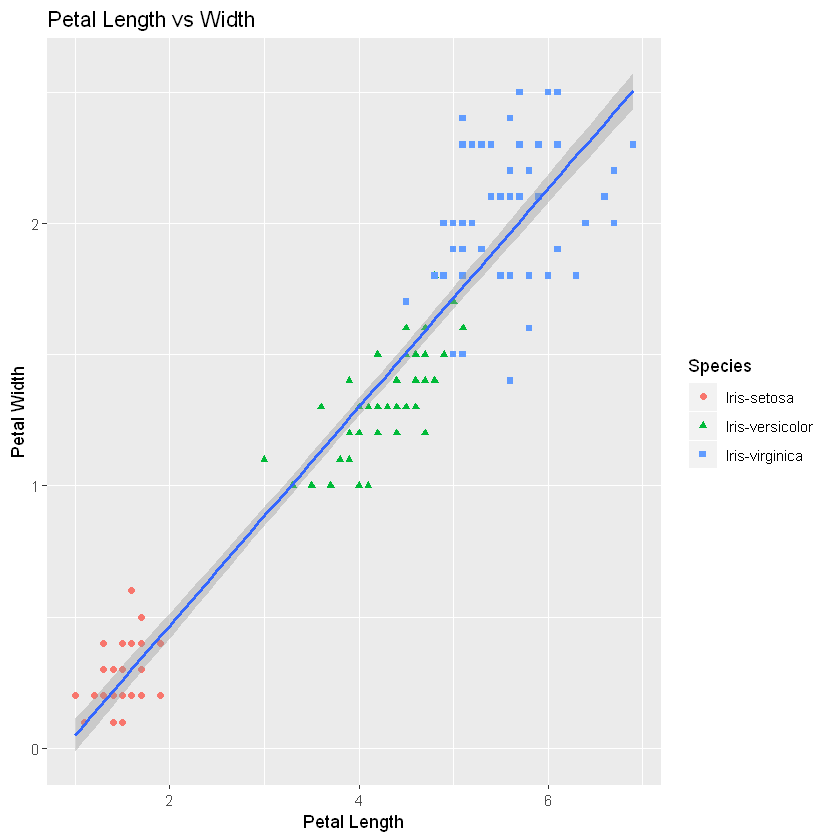

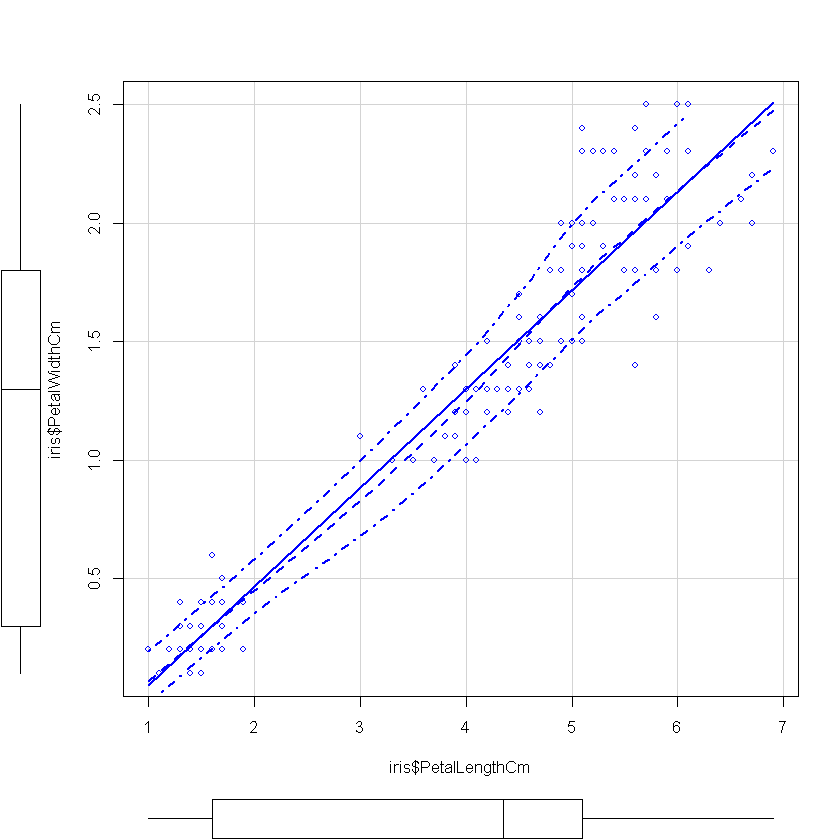

In [8]:
ggplot(data = iris, aes(x = PetalLengthCm, y = PetalWidthCm))+
  xlab("Petal Length")+
  ylab("Petal Width") +
  geom_point(aes(color = Species,shape=Species))+
  geom_smooth(method='lm')+
  ggtitle("Petal Length vs Width")


library(car)
scatterplot(iris$PetalLengthCm,iris$PetalWidthCm)

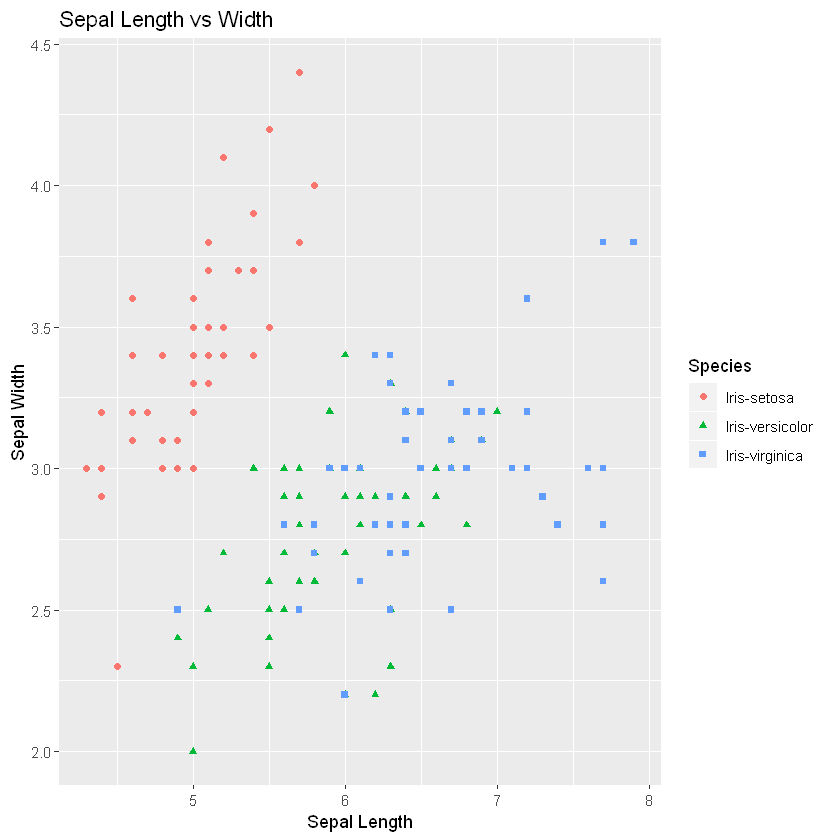

In [9]:
ggplot(data=iris, aes(x = SepalLengthCm, y = SepalWidthCm)) +
  geom_point(aes(color=Species, shape=Species)) +
  xlab("Sepal Length") + 
  ylab("Sepal Width") +
  ggtitle("Sepal Length vs Width")

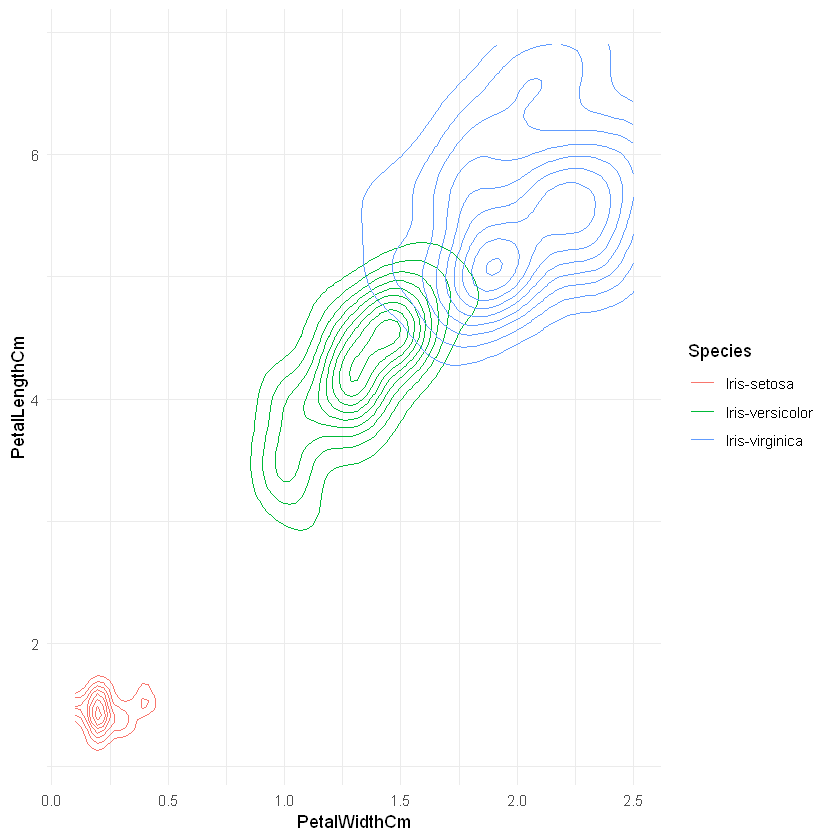

In [10]:
ggplot(data=iris,aes(x=PetalWidthCm,y=PetalLengthCm,color=Species)) + geom_density2d() + theme_minimal()

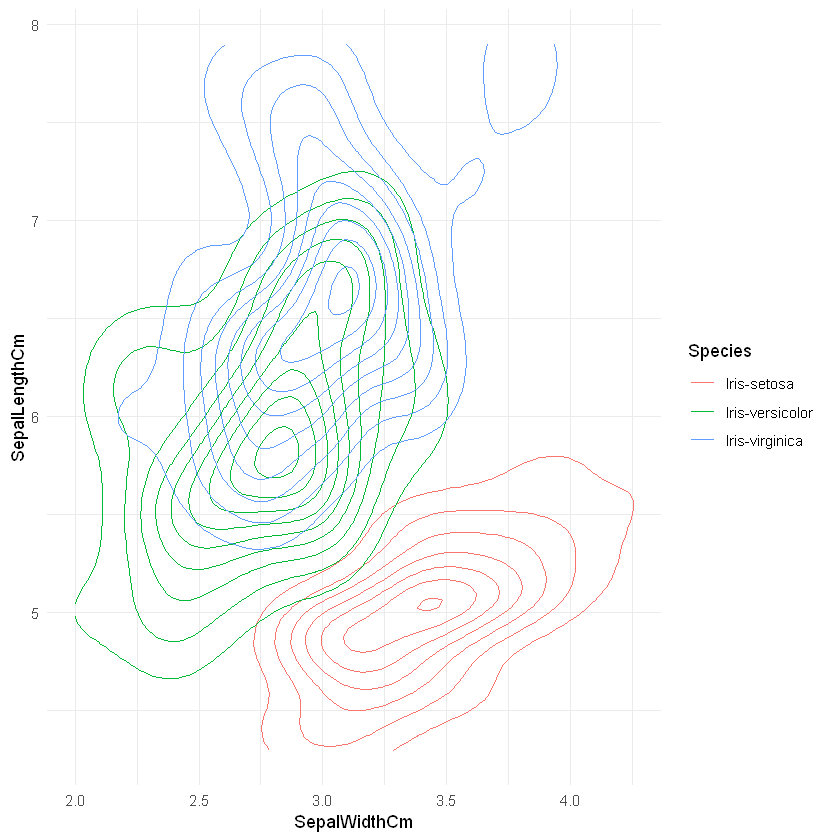

In [11]:
ggplot(data=iris,aes(x=SepalWidthCm,y=SepalLengthCm,color=Species)) + geom_density2d() + theme_minimal()